In [2]:
#Import the packages
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.svm import SVC , NuSVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics  
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot as plt
import os 
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import cross_val_score
import pylab as pl
import pandas as pd
from sklearn.utils.multiclass import unique_labels

## LOAD THE DATASETS
8330 samples and 7 features.

In [21]:
def load_dataset():
    load = sio.loadmat('features(10)_cwt')
    features = np.array(load['features'])
    #print(features.shape)
    load = sio.loadmat('SC4001E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = b[800:1633,1]
    load = sio.loadmat('SC4011E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4012E0-PSG_hyp.mat') 
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4021E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4022E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4031E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4032E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4041E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4042E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4051E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    #print(max(labels))
    labels = np.where(labels==4,3,labels)
    labels = np.where(labels==6,0,labels)
    labels = np.where(labels==5,4,labels)
    #print(len(np.where(labels==1)[0]))
    #print(max(labels))
    feat = features[800:1633,:]
    #print(feat.shape)
    for i in range (1,10):
        feat =  np.append(features[800+i*1633:1633+i*1633,:],feat,axis=0) 
    #print(feat.shape)
    return feat, labels

## PERCEPTRON ALGORITHM
The algorithm failed to converge (tol=1e-3) even after 50,000 iterations (max_iter=100 given below for quick runtime but it was tested for max_iter=50000). Convergence is based on the Avg. Loss between sucessive iterations being lower than tolerance. The data set may not be linearly separable and will require kernels in the SVM

In [25]:
feat, labels = load_dataset()
scaler = StandardScaler()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
perceptron =linear_model.Perceptron(penalty='l2',max_iter=1000,verbose=2)
perceptron.fit(x_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 5.38, NNZs: 7, Bias: -5.000000, T: 7497, Avg. loss: 1.264573
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.09, NNZs: 7, Bias: -7.000000, T: 14994, Avg. loss: 1.265807
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.24, NNZs: 7, Bias: -3.000000, T: 22491, Avg. loss: 1.271815
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.66, NNZs: 7, Bias: -2.000000, T: 29988, Avg. loss: 1.308321
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.62, NNZs: 7, Bias: -6.000000, T: 37485, Avg. loss: 1.231258
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.64, NNZs: 7, Bias: -4.000000, T: 44982, Avg. loss: 1.292754
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.17, NNZs: 7, Bias: -5.000000, T: 52479, Avg. loss: 1.282312
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.61, NNZs: 7, Bias: -4.000000, T: 59976, Avg. loss: 1.269889
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.19, NNZs: 7, Bias: -6.000000, T: 67473, Avg. loss: 1.230382
Total trai

Norm: 6.04, NNZs: 7, Bias: -5.000000, T: 3291183, Avg. loss: 1.280580
Total training time: 0.17 seconds.
-- Epoch 440
Norm: 6.40, NNZs: 7, Bias: -6.000000, T: 3298680, Avg. loss: 1.271701
Total training time: 0.17 seconds.
-- Epoch 441
Norm: 6.36, NNZs: 7, Bias: -3.000000, T: 3306177, Avg. loss: 1.267376
Total training time: 0.18 seconds.
-- Epoch 442
Norm: 6.17, NNZs: 7, Bias: -4.000000, T: 3313674, Avg. loss: 1.255308
Total training time: 0.18 seconds.
-- Epoch 443
Norm: 4.32, NNZs: 7, Bias: -4.000000, T: 3321171, Avg. loss: 1.254812
Total training time: 0.18 seconds.
-- Epoch 444
Norm: 3.43, NNZs: 7, Bias: -5.000000, T: 3328668, Avg. loss: 1.273020
Total training time: 0.18 seconds.
-- Epoch 445
Norm: 5.17, NNZs: 7, Bias: -2.000000, T: 3336165, Avg. loss: 1.256383
Total training time: 0.18 seconds.
-- Epoch 446
Norm: 4.98, NNZs: 7, Bias: -2.000000, T: 3343662, Avg. loss: 1.311278
Total training time: 0.18 seconds.
-- Epoch 447
Norm: 5.80, NNZs: 7, Bias: -2.000000, T: 3351159, Avg. l

Norm: 6.47, NNZs: 7, Bias: 0.000000, T: 6784785, Avg. loss: 1.270977
Total training time: 0.36 seconds.
-- Epoch 906
Norm: 5.34, NNZs: 7, Bias: -4.000000, T: 6792282, Avg. loss: 1.291170
Total training time: 0.36 seconds.
-- Epoch 907
Norm: 6.18, NNZs: 7, Bias: -4.000000, T: 6799779, Avg. loss: 1.298731
Total training time: 0.36 seconds.
-- Epoch 908
Norm: 6.35, NNZs: 7, Bias: -6.000000, T: 6807276, Avg. loss: 1.267854
Total training time: 0.36 seconds.
-- Epoch 909
Norm: 6.25, NNZs: 7, Bias: -6.000000, T: 6814773, Avg. loss: 1.279022
Total training time: 0.36 seconds.
-- Epoch 910
Norm: 4.68, NNZs: 7, Bias: -7.000000, T: 6822270, Avg. loss: 1.306177
Total training time: 0.36 seconds.
-- Epoch 911
Norm: 4.58, NNZs: 7, Bias: -5.000000, T: 6829767, Avg. loss: 1.302721
Total training time: 0.36 seconds.
-- Epoch 912
Norm: 4.82, NNZs: 7, Bias: -3.000000, T: 6837264, Avg. loss: 1.275823
Total training time: 0.37 seconds.
-- Epoch 913
Norm: 4.96, NNZs: 7, Bias: -6.000000, T: 6844761, Avg. lo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 4.64, NNZs: 7, Bias: -7.000000, T: 3253698, Avg. loss: 0.695127
Total training time: 0.15 seconds.
-- Epoch 435
Norm: 5.36, NNZs: 7, Bias: -5.000000, T: 3261195, Avg. loss: 0.674123
Total training time: 0.15 seconds.
-- Epoch 436
Norm: 5.15, NNZs: 7, Bias: -7.000000, T: 3268692, Avg. loss: 0.681113
Total training time: 0.15 seconds.
-- Epoch 437
Norm: 5.45, NNZs: 7, Bias: -4.000000, T: 3276189, Avg. loss: 0.667432
Total training time: 0.15 seconds.
-- Epoch 438
Norm: 5.32, NNZs: 7, Bias: -8.000000, T: 3283686, Avg. loss: 0.682909
Total training time: 0.15 seconds.
-- Epoch 439
Norm: 6.26, NNZs: 7, Bias: -5.000000, T: 3291183, Avg. loss: 0.671268
Total training time: 0.15 seconds.
-- Epoch 440
Norm: 4.87, NNZs: 7, Bias: -6.000000, T: 3298680, Avg. loss: 0.672509
Total training time: 0.15 seconds.
-- Epoch 441
Norm: 4.83, NNZs: 7, Bias: -8.000000, T: 3306177, Avg. loss: 0.690650
Total training time: 0.15 seconds.
-- Epoch 442
Norm: 6.15, NNZs: 7, Bias: -5.000000, T: 3313674, Avg. l

Norm: 8.93, NNZs: 7, Bias: -5.000000, T: 7317072, Avg. loss: 0.677027
Total training time: 0.34 seconds.
-- Epoch 977
Norm: 5.91, NNZs: 7, Bias: -7.000000, T: 7324569, Avg. loss: 0.695429
Total training time: 0.34 seconds.
-- Epoch 978
Norm: 7.15, NNZs: 7, Bias: -8.000000, T: 7332066, Avg. loss: 0.697812
Total training time: 0.34 seconds.
-- Epoch 979
Norm: 5.95, NNZs: 7, Bias: -5.000000, T: 7339563, Avg. loss: 0.681044
Total training time: 0.34 seconds.
-- Epoch 980
Norm: 4.28, NNZs: 7, Bias: -9.000000, T: 7347060, Avg. loss: 0.672805
Total training time: 0.34 seconds.
-- Epoch 981
Norm: 6.08, NNZs: 7, Bias: -6.000000, T: 7354557, Avg. loss: 0.674035
Total training time: 0.34 seconds.
-- Epoch 982
Norm: 6.08, NNZs: 7, Bias: -6.000000, T: 7362054, Avg. loss: 0.701919
Total training time: 0.34 seconds.
-- Epoch 983
Norm: 7.40, NNZs: 7, Bias: -8.000000, T: 7369551, Avg. loss: 0.678552
Total training time: 0.34 seconds.
-- Epoch 984
Norm: 4.41, NNZs: 7, Bias: -7.000000, T: 7377048, Avg. l

Norm: 3.55, NNZs: 7, Bias: 3.000000, T: 3036285, Avg. loss: 1.905327
Total training time: 0.18 seconds.
-- Epoch 406
Norm: 6.39, NNZs: 7, Bias: 0.000000, T: 3043782, Avg. loss: 1.932700
Total training time: 0.18 seconds.
-- Epoch 407
Norm: 3.42, NNZs: 7, Bias: -2.000000, T: 3051279, Avg. loss: 1.961941
Total training time: 0.18 seconds.
-- Epoch 408
Norm: 5.08, NNZs: 7, Bias: -1.000000, T: 3058776, Avg. loss: 1.953945
Total training time: 0.18 seconds.
-- Epoch 409
Norm: 5.76, NNZs: 7, Bias: 0.000000, T: 3066273, Avg. loss: 1.890859
Total training time: 0.18 seconds.
-- Epoch 410
Norm: 4.68, NNZs: 7, Bias: -2.000000, T: 3073770, Avg. loss: 1.936258
Total training time: 0.18 seconds.
-- Epoch 411
Norm: 4.19, NNZs: 7, Bias: 2.000000, T: 3081267, Avg. loss: 1.961516
Total training time: 0.18 seconds.
-- Epoch 412
Norm: 3.08, NNZs: 7, Bias: -2.000000, T: 3088764, Avg. loss: 1.925827
Total training time: 0.18 seconds.
-- Epoch 413
Norm: 6.71, NNZs: 7, Bias: 1.000000, T: 3096261, Avg. loss: 

Norm: 4.41, NNZs: 7, Bias: 0.000000, T: 5787684, Avg. loss: 1.924377
Total training time: 0.37 seconds.
-- Epoch 773
Norm: 6.60, NNZs: 7, Bias: 0.000000, T: 5795181, Avg. loss: 1.913073
Total training time: 0.37 seconds.
-- Epoch 774
Norm: 8.34, NNZs: 7, Bias: 3.000000, T: 5802678, Avg. loss: 1.905695
Total training time: 0.37 seconds.
-- Epoch 775
Norm: 2.69, NNZs: 7, Bias: 0.000000, T: 5810175, Avg. loss: 1.913775
Total training time: 0.37 seconds.
-- Epoch 776
Norm: 6.99, NNZs: 7, Bias: -3.000000, T: 5817672, Avg. loss: 1.898779
Total training time: 0.37 seconds.
-- Epoch 777
Norm: 3.05, NNZs: 7, Bias: 1.000000, T: 5825169, Avg. loss: 1.962408
Total training time: 0.37 seconds.
-- Epoch 778
Norm: 5.06, NNZs: 7, Bias: 0.000000, T: 5832666, Avg. loss: 1.957093
Total training time: 0.37 seconds.
-- Epoch 779
Norm: 3.84, NNZs: 7, Bias: -2.000000, T: 5840163, Avg. loss: 1.934838
Total training time: 0.37 seconds.
-- Epoch 780
Norm: 2.37, NNZs: 7, Bias: -2.000000, T: 5847660, Avg. loss: 1

Norm: 4.89, NNZs: 7, Bias: -4.000000, T: 1746801, Avg. loss: 0.988505
Total training time: 0.08 seconds.
-- Epoch 234
Norm: 4.35, NNZs: 7, Bias: -7.000000, T: 1754298, Avg. loss: 1.057347
Total training time: 0.08 seconds.
-- Epoch 235
Norm: 3.78, NNZs: 7, Bias: -3.000000, T: 1761795, Avg. loss: 1.010797
Total training time: 0.09 seconds.
-- Epoch 236
Norm: 6.68, NNZs: 7, Bias: -6.000000, T: 1769292, Avg. loss: 0.996983
Total training time: 0.09 seconds.
-- Epoch 237
Norm: 4.81, NNZs: 7, Bias: -6.000000, T: 1776789, Avg. loss: 0.968109
Total training time: 0.09 seconds.
-- Epoch 238
Norm: 5.06, NNZs: 7, Bias: -5.000000, T: 1784286, Avg. loss: 0.967603
Total training time: 0.09 seconds.
-- Epoch 239
Norm: 7.76, NNZs: 7, Bias: -2.000000, T: 1791783, Avg. loss: 0.987736
Total training time: 0.09 seconds.
-- Epoch 240
Norm: 3.84, NNZs: 7, Bias: -4.000000, T: 1799280, Avg. loss: 1.005459
Total training time: 0.09 seconds.
-- Epoch 241
Norm: 4.94, NNZs: 7, Bias: -5.000000, T: 1806777, Avg. l

Norm: 4.64, NNZs: 7, Bias: -6.000000, T: 5712714, Avg. loss: 0.994296
Total training time: 0.27 seconds.
-- Epoch 763
Norm: 3.86, NNZs: 7, Bias: -4.000000, T: 5720211, Avg. loss: 0.991296
Total training time: 0.27 seconds.
-- Epoch 764
Norm: 6.28, NNZs: 7, Bias: -7.000000, T: 5727708, Avg. loss: 0.981004
Total training time: 0.27 seconds.
-- Epoch 765
Norm: 7.81, NNZs: 7, Bias: -4.000000, T: 5735205, Avg. loss: 0.998529
Total training time: 0.27 seconds.
-- Epoch 766
Norm: 4.94, NNZs: 7, Bias: -5.000000, T: 5742702, Avg. loss: 0.994941
Total training time: 0.27 seconds.
-- Epoch 767
Norm: 3.93, NNZs: 7, Bias: -8.000000, T: 5750199, Avg. loss: 1.030348
Total training time: 0.27 seconds.
-- Epoch 768
Norm: 5.73, NNZs: 7, Bias: -5.000000, T: 5757696, Avg. loss: 1.027885
Total training time: 0.27 seconds.
-- Epoch 769
Norm: 5.10, NNZs: 7, Bias: -7.000000, T: 5765193, Avg. loss: 0.982665
Total training time: 0.28 seconds.
-- Epoch 770
Norm: 3.84, NNZs: 7, Bias: -7.000000, T: 5772690, Avg. l

Norm: 5.04, NNZs: 7, Bias: -6.000000, T: 1956717, Avg. loss: 1.128792
Total training time: 0.10 seconds.
-- Epoch 262
Norm: 6.03, NNZs: 7, Bias: -5.000000, T: 1964214, Avg. loss: 1.137857
Total training time: 0.10 seconds.
-- Epoch 263
Norm: 5.58, NNZs: 7, Bias: -5.000000, T: 1971711, Avg. loss: 1.078518
Total training time: 0.10 seconds.
-- Epoch 264
Norm: 7.36, NNZs: 7, Bias: -9.000000, T: 1979208, Avg. loss: 1.098403
Total training time: 0.10 seconds.
-- Epoch 265
Norm: 6.14, NNZs: 7, Bias: -4.000000, T: 1986705, Avg. loss: 1.100911
Total training time: 0.10 seconds.
-- Epoch 266
Norm: 7.32, NNZs: 7, Bias: -7.000000, T: 1994202, Avg. loss: 1.116045
Total training time: 0.10 seconds.
-- Epoch 267
Norm: 8.59, NNZs: 7, Bias: -4.000000, T: 2001699, Avg. loss: 1.131747
Total training time: 0.10 seconds.
-- Epoch 268
Norm: 7.32, NNZs: 7, Bias: -3.000000, T: 2009196, Avg. loss: 1.086165
Total training time: 0.10 seconds.
-- Epoch 269
Norm: 8.35, NNZs: 7, Bias: -4.000000, T: 2016693, Avg. l

Norm: 5.96, NNZs: 7, Bias: -4.000000, T: 5630247, Avg. loss: 1.118807
Total training time: 0.29 seconds.
-- Epoch 752
Norm: 6.03, NNZs: 7, Bias: -6.000000, T: 5637744, Avg. loss: 1.118591
Total training time: 0.29 seconds.
-- Epoch 753
Norm: 4.74, NNZs: 7, Bias: -6.000000, T: 5645241, Avg. loss: 1.123454
Total training time: 0.29 seconds.
-- Epoch 754
Norm: 4.82, NNZs: 7, Bias: -5.000000, T: 5652738, Avg. loss: 1.108605
Total training time: 0.29 seconds.
-- Epoch 755
Norm: 8.47, NNZs: 7, Bias: -3.000000, T: 5660235, Avg. loss: 1.146704
Total training time: 0.29 seconds.
-- Epoch 756
Norm: 6.72, NNZs: 7, Bias: -6.000000, T: 5667732, Avg. loss: 1.090676
Total training time: 0.29 seconds.
-- Epoch 757
Norm: 5.61, NNZs: 7, Bias: -5.000000, T: 5675229, Avg. loss: 1.113386
Total training time: 0.29 seconds.
-- Epoch 758
Norm: 5.34, NNZs: 7, Bias: -5.000000, T: 5682726, Avg. loss: 1.093391
Total training time: 0.29 seconds.
-- Epoch 759
Norm: 7.78, NNZs: 7, Bias: -6.000000, T: 5690223, Avg. l

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l2', random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=2, warm_start=False)

## SVM
10% of dataset is used for testing and 90% for testing. Cross validation was done using k-fold cross validation with $k=5$ and validation was made based using classification accuracy as the scoring metric. The hyperparameters explored here were: 'gamma' for regularization and 'C' for the penalty parameter of the error fucntion. The kernel used was the 'radial basis function'. The polynomial and sigmoid functions were also experimented with (not shown in the code below; just set kernel='sigmoid' in line 7 if required) but did not improve accuracy. Graphs of accuracy accross the variation of hyper parameters are shown. 

In [23]:
def svm_single_cv(x_train ,x_test, y_train, y_test,use_preset_param):
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    if use_preset_param==False:
        acc = []
        for i in range (1,20):
            svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=i)
            scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
            acc.append(np.mean(scores))
            print("iteration number fo gamma: ", i)
        plt.figure(figsize=(12, 6))  
        plt.plot(range(1, 20), acc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
        plt.title('Accuracy vs gamma Value')  
        plt.xlabel('gamma Value')  
        plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
        gamma = (np.argmax(acc)+1)/1
        acc = []
        for i in range (1,20):
            svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=gamma,C=i/10)
            scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
            acc.append(np.mean(scores))
            print("iteration number for C: ", i)
        plt.figure(figsize=(12, 6)) 
        plt_x = np.linspace(0.1,1.9,num=19)
        plt.plot(plt_x, acc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
        plt.title('Accuracy vs C Value')  
        plt.xlabel('C Value')  
        plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
        C = (np.argmax(acc)+1)/10
        svclassifier = SVC(kernel='rbf',gamma=gamma,C=C)
        svclassifier.fit(x_train, y_train)
        y_pred = svclassifier.predict(x_test)
        print("Accuracy during training:",metrics.accuracy_score(y_test, y_pred))
        print("Gamma optimum = ",gamma)
        print("C optimum =", C)
    elif use_preset_param==True:
        svclassifier = SVC(kernel='rbf',cache_size=1000,gamma=3,C=1)
        svclassifier.fit(x_train, y_train)
        y_pred = svclassifier.predict(x_test)
    return svclassifier , y_pred   

iteration number fo gamma:  1
iteration number fo gamma:  2
iteration number fo gamma:  3
iteration number fo gamma:  4
iteration number fo gamma:  5
iteration number fo gamma:  6
iteration number fo gamma:  7
iteration number fo gamma:  8
iteration number fo gamma:  9
iteration number fo gamma:  10
iteration number fo gamma:  11
iteration number fo gamma:  12
iteration number fo gamma:  13
iteration number fo gamma:  14
iteration number fo gamma:  15
iteration number fo gamma:  16
iteration number fo gamma:  17
iteration number fo gamma:  18
iteration number fo gamma:  19
iteration number for C:  1
iteration number for C:  2
iteration number for C:  3
iteration number for C:  4
iteration number for C:  5
iteration number for C:  6
iteration number for C:  7
iteration number for C:  8
iteration number for C:  9
iteration number for C:  10
iteration number for C:  11
iteration number for C:  12
iteration number for C:  13
iteration number for C:  14
iteration number for C:  15
iteration

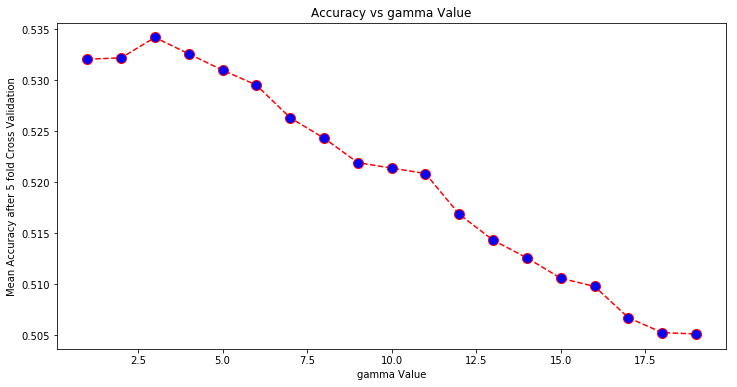

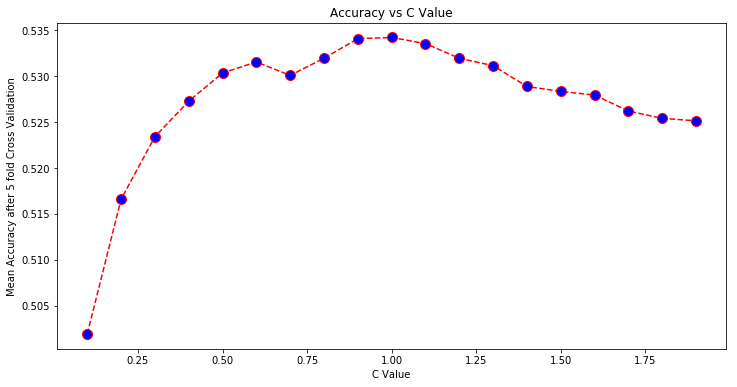

In [24]:
feat, labels = load_dataset()
scaler = StandardScaler()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
#set use_preset_param to False to view the results of cross-validation of hyperparameters
#set use_preset_param to True to see pre-calculated optimum values of hyperparameters for quick results.
svclassifier, y_pred = svm_single_cv(x_train ,x_test, y_train, y_test,use_preset_param=False)
print("Accuracy on test dataset:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))  
print(metrics.classification_report(y_test, y_pred))

## PLOT CONFUSION MATRIX
SVM classifies label 0 and 2 with highest precision and recall. The classifer find it hard to detect labels 1 and 3. Most of the predictions are labels 0 , 2 and 4. These probably have higher difference in features between them, making them easier to classify among themselves. 

Confusion matrix, without normalization
[[ 88  11  40   0  17]
 [ 28   6  23   0   6]
 [130  29 132   8  66]
 [ 43  12  32   1  12]
 [ 55  14  49   1  30]]
Normalized confusion matrix
[[0.56 0.07 0.26 0.   0.11]
 [0.44 0.1  0.37 0.   0.1 ]
 [0.36 0.08 0.36 0.02 0.18]
 [0.43 0.12 0.32 0.01 0.12]
 [0.37 0.09 0.33 0.01 0.2 ]]


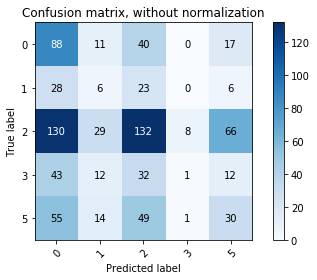

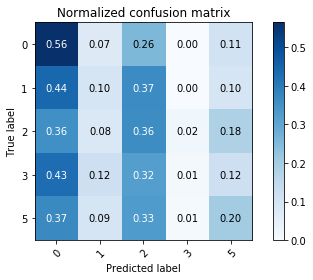

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = [0,1,2,3,5]
class_names = np.array(class_names)
class_names = class_names.astype(int)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

## KNN ALGORITHM
A KNN algorithm was run on the dataset. The number of nearest neighbours was determined again by cross-validation and optimum value of neighbours was used to finally classify the dataset. Plots of accruacy across number of neighbours is shown below along with the accuracy, confusion matrix and classification metrics are shown below:

max accuracy during training = 0.5274068395738144
Accuracy on the test dataset: 0.517406962785114
[[ 85   0  63   5   3]
 [  5   3  52   1   2]
 [ 35   2 309  12   7]
 [ 16   1  61  16   6]
 [  7   0 117   7  18]]
              precision    recall  f1-score   support

           0       0.57      0.54      0.56       156
           1       0.50      0.05      0.09        63
           2       0.51      0.85      0.64       365
           3       0.39      0.16      0.23       100
           4       0.50      0.12      0.19       149

   micro avg       0.52      0.52      0.52       833
   macro avg       0.50      0.34      0.34       833
weighted avg       0.51      0.52      0.45       833

Confusion matrix, without normalization
[[ 85   0  63   5   3]
 [  5   3  52   1   2]
 [ 35   2 309  12   7]
 [ 16   1  61  16   6]
 [  7   0 117   7  18]]
Normalized confusion matrix
[[0.54 0.   0.4  0.03 0.02]
 [0.08 0.05 0.83 0.02 0.03]
 [0.1  0.01 0.85 0.03 0.02]
 [0.16 0.01 0.61 0.16 0.06]
 

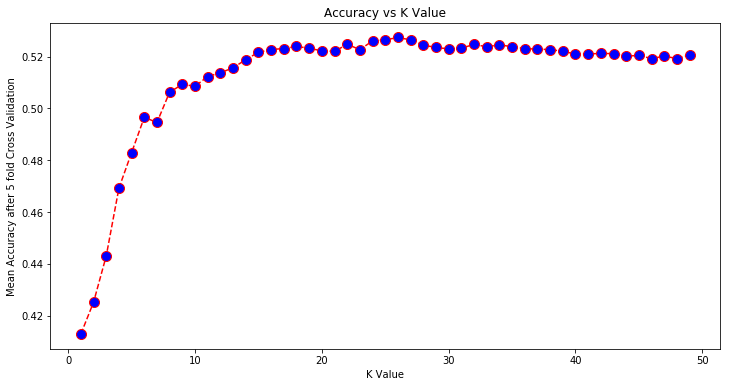

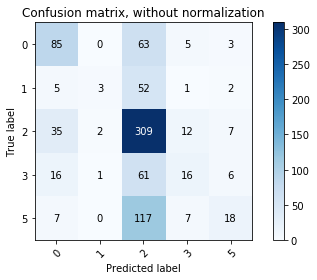

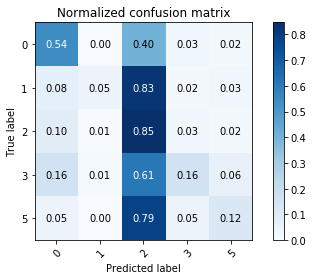

In [22]:
feat, labels = load_dataset()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=8)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
acc = []
# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(x_train, y_train)
    #pred_i = knn.predict(x_test)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    acc.append(np.mean(scores))
    #print("err=", np.mean(pred_i != y_test))
    #print("Accuracy:",metrics.accuracy_score(pred_i, y_pred))
    #print(metrics.confusion_matrix(y_test, pred_i))  
    #print(metrics.classification_report(y_test, pred_i))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
print("max accuracy during training =",max(acc))
k=np.argmax(acc)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy on the test dataset:",metrics.accuracy_score(y_pred, y_test))
print(metrics.confusion_matrix(y_test, y_pred))  
print(metrics.classification_report(y_test, y_pred))
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')